In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

Bearing in mind the advantages of the extracted data from Yelp over Foursquare in terms of more features and higher amount of POIs (5 times more), the join in this part will be performed between Yelp and Citibikes data.

In [3]:
# Load CSV files
CityBikes_df = pd.read_csv('../data/CityBikes.csv', encoding="unicode_escape")
Yelp_df = pd.read_csv('../data/Yelp.csv', encoding="unicode_escape")

In [4]:
#Join data from Part 1 and 2
Bikes_Toronto = pd.merge(CityBikes_df, Yelp_df, how='inner', on = 'lat_lon')

Bikes_Toronto.head()

,id,name,lat_lon,free_bikes,poi_name,dist2station,rating,reviews
0,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Jaclyn's,172.375134,4.5,15
1,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Casa Di Giorgios,408.715724,4.0,74
2,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Lake Inez,794.661955,4.5,94
3,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Mattachioni,815.148564,4.5,5
4,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Chino Locos Original,467.122546,4.0,190


In [17]:
#Store resulting df into CSV file
Bikes_Toronto.to_csv(r'../data/Bikes_Toronto.csv', index=False, sep=',') 

In [33]:
#Number of rows and columns
Bikes_Toronto.shape

(30455, 8)

In [32]:
#df info
Bikes_Toronto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30455 entries, 0 to 30454
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            30455 non-null  int64  
 1   name          30455 non-null  object 
 2   lat_lon       30455 non-null  object 
 3   free_bikes    30455 non-null  int64  
 4   poi_name      30455 non-null  object 
 5   dist2station  30455 non-null  float64
 6   rating        30455 non-null  float64
 7   reviews       30455 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 2.1+ MB


In [18]:
#summary statistics
Bikes_Toronto.describe()

,id,free_bikes,dist2station,rating,reviews
count,30455.000000,30455.000000,3.045500e+04,30455.000000,30455.000000
mean,7370.508554,8.186406,5.761097e+02,3.851601,119.253850
std,225.032772,6.081782,3.039140e+02,0.955838,266.633411
min,7000.000000,0.000000,1.023678e-09,0.000000,0.000000
25%,7171.000000,3.000000,3.346170e+02,3.500000,9.000000
50%,7362.000000,7.000000,5.700956e+02,4.000000,35.000000
75%,7565.000000,12.000000,8.034584e+02,4.500000,116.000000
max,7769.000000,32.000000,1.402369e+03,5.000000,3364.000000


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

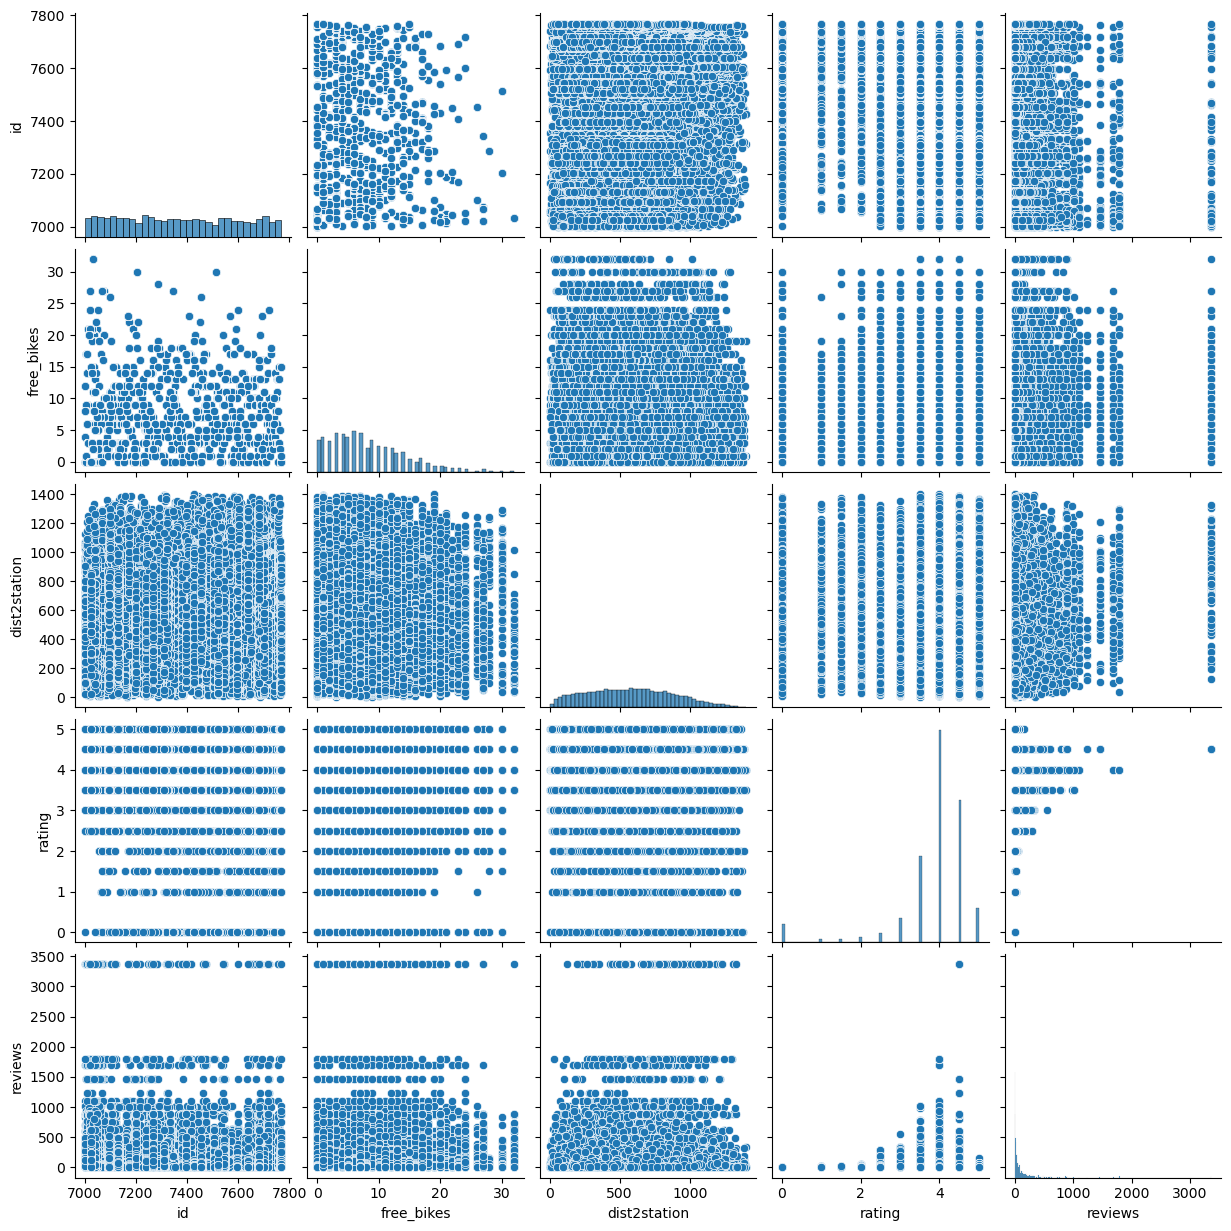

In [19]:
#plot all the possible combinations

sns.pairplot(Bikes_Toronto)
plt.show()

From the figures above is not possible to visually identify a clear correlation or normal distribution of the variables 

In [7]:
#Calculate correlation
BT_corr=Bikes_Toronto.corr()
BT_corr

,id,free_bikes,dist2station,rating,reviews
id,1.000000,-0.100242,0.103921,-0.182948,-0.103336
free_bikes,-0.100242,1.000000,0.008166,0.000053,0.081768
dist2station,0.103921,0.008166,1.000000,0.016388,0.023329
rating,-0.182948,0.000053,0.016388,1.000000,0.091526
reviews,-0.103336,0.081768,0.023329,0.091526,1.000000


<AxesSubplot:>

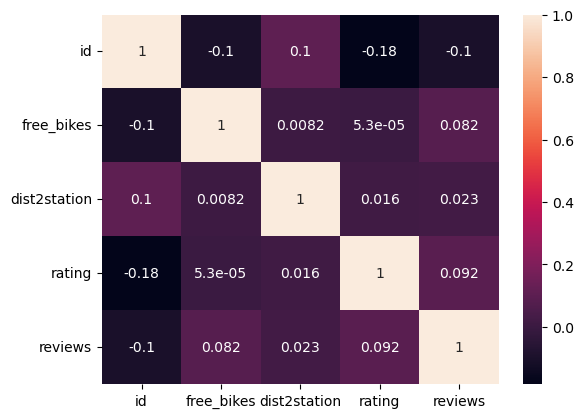

In [10]:
#Heatmap
ax=sns.heatmap(BT_corr, annot = True)
ax

<AxesSubplot:xlabel='free_bikes', ylabel='Count'>

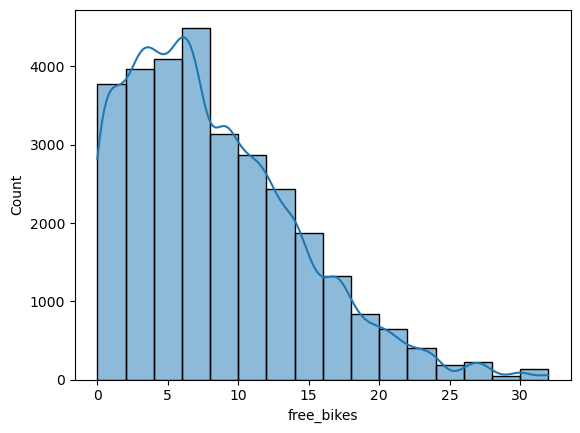

In [11]:
# Histogram and density function
sns.histplot(data = Bikes_Toronto['free_bikes'] , binwidth=2 , kde = True )

The distribution of the dependent variable is skewed to the right.

<AxesSubplot:ylabel='free_bikes'>

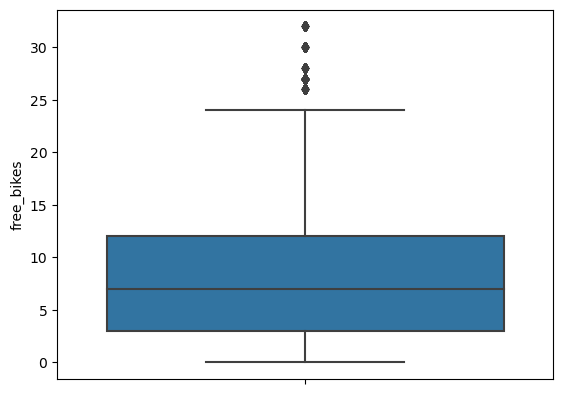

In [16]:
#Box PLot
sns.boxplot(data=Bikes_Toronto, y='free_bikes')

The graph above shows potential outliers to be analized

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [34]:
import sqlite3
from sqlite3 import Error

#function to open connection
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print('Connection to SQLite DB successful')
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [35]:
#Open connection
connection = create_connection('sm_app.sqlite')
connection

Connection to SQLite DB successful


In [36]:
#Function to execute queries
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [37]:
#Create table 
create_BikesToronto_table = """
CREATE TABLE IF NOT EXISTS users (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  age INTEGER,
  gender TEXT,
  nationality TEXT
);
"""
#Function execution
execute_query(connection, create_BikesToronto_table)  

Query executed successfully


In [41]:
delete_data = "DELETE FROM BikesToronto"
execute_query(connection, delete_data)
table_name = 'BikesToronto'

#load table from df
Bikes_Toronto.to_sql(table_name, connection, if_exists='replace', index=False)
connection.commit()
connection.close()

Query executed successfully


In [42]:
connection = create_connection('sm_app.sqlite')

select_BikesToronto = "SELECT * FROM BikesToronto"

BikesToronto_tab = pd.read_sql_query(select_BikesToronto, connection)
BikesToronto_tab

Connection to SQLite DB successful


,id,name,lat_lon,free_bikes,poi_name,dist2station,rating,reviews
0,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Jaclyn's,172.375134,4.5,15
1,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Casa Di Giorgios,408.715724,4.0,74
2,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Lake Inez,794.661955,4.5,94
3,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Mattachioni,815.148564,4.5,5
4,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Chino Locos Original,467.122546,4.0,190
...,...,...,...,...,...,...,...,...
30450,7681,25 Booth Ave,"43.6544839,-79.34105699999999",7,Dave's Hot Chicken,1026.824835,4.0,21
30451,7681,25 Booth Ave,"43.6544839,-79.34105699999999",7,My Roti Place,720.231561,4.0,13
30452,7681,25 Booth Ave,"43.6544839,-79.34105699999999",7,Riverside Burgers,914.845418,4.5,14
30453,7681,25 Booth Ave,"43.6544839,-79.34105699999999",7,Hanley's Nashville Hot Chicken,762.212241,3.5,5


Look at the data before and after the join to validate your data.

In [40]:
#Before the join:
Bikes_Toronto

,id,name,lat_lon,free_bikes,poi_name,dist2station,rating,reviews
0,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Jaclyn's,172.375134,4.5,15
1,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Casa Di Giorgios,408.715724,4.0,74
2,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Lake Inez,794.661955,4.5,94
3,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Mattachioni,815.148564,4.5,5
4,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Chino Locos Original,467.122546,4.0,190
...,...,...,...,...,...,...,...,...
30450,7681,25 Booth Ave,"43.6544839,-79.34105699999999",7,Dave's Hot Chicken,1026.824835,4.0,21
30451,7681,25 Booth Ave,"43.6544839,-79.34105699999999",7,My Roti Place,720.231561,4.0,13
30452,7681,25 Booth Ave,"43.6544839,-79.34105699999999",7,Riverside Burgers,914.845418,4.5,14
30453,7681,25 Booth Ave,"43.6544839,-79.34105699999999",7,Hanley's Nashville Hot Chicken,762.212241,3.5,5


In [43]:
#After the join:
BikesToronto_tab

,id,name,lat_lon,free_bikes,poi_name,dist2station,rating,reviews
0,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Jaclyn's,172.375134,4.5,15
1,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Casa Di Giorgios,408.715724,4.0,74
2,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Lake Inez,794.661955,4.5,94
3,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Mattachioni,815.148564,4.5,5
4,7303,Queen St E / Woodward Ave,"43.665269,-79.319796",5,Chino Locos Original,467.122546,4.0,190
...,...,...,...,...,...,...,...,...
30450,7681,25 Booth Ave,"43.6544839,-79.34105699999999",7,Dave's Hot Chicken,1026.824835,4.0,21
30451,7681,25 Booth Ave,"43.6544839,-79.34105699999999",7,My Roti Place,720.231561,4.0,13
30452,7681,25 Booth Ave,"43.6544839,-79.34105699999999",7,Riverside Burgers,914.845418,4.5,14
30453,7681,25 Booth Ave,"43.6544839,-79.34105699999999",7,Hanley's Nashville Hot Chicken,762.212241,3.5,5
